In [4]:
#necessary imports
import matplotlib.pyplot as plt  #plotting
from matplotlib.colors import LogNorm
import matplotlib
import numpy as np
import astropy.units as u
from astropy.constants import G
from astropy import constants as const
import scipy.optimize as so #for density contours

#fitting ellipse
from photutils.isophote import EllipseGeometry
from photutils.aperture import EllipticalAperture
from photutils.isophote import Ellipse

#Single galaxy data reading
from ReadFile import Read
from CenterOfMassSingle import CenterOfMass as COMS
from MassProfileSingle import MassProfile as MPS
from MassProfileSingle import mEncPlot as MPPS
from GalaxyMassSingle import ComponentMass as CMS

#Combined galaxy data reading
from ReadCombined import ReadCombined
from CenterOfMassCombined import CenterOfMass as COMC
from MassProfileCombined import MassProfile as MPC
from MassProfileCombined import mEncPlot as MPPC
from GalaxyMassCombined import ComponentMass as CMC

In [ ]:
# TASK LIST
# COMPLETE 1. identify COM of merged galaxy and its snapshot
# COMPLETE 2. isolated merged galaxy snapshots
# COMPLETE 3. identify positions of combined MW-M31 halo particles with in COM reference frame
# COMPLETE 4. plot xy, xz, yz projections of dark matter halo (can animate)
# COMPLETE 5. Find hernquist profile scale radius
# COMPLETE 6. translate coordinate axes s.t. AM points in z-direction
# COMPLETE 7. Plot isodensity contours at R200 for each projection 
# COMPLETE 8. Fit ellipse to isodensity contour using photutils to find ellipticity of each axis.
# COMPLETE 9. do this for each snapshot and plot axis ratios versus time. 
# 10. (for fun) create 3D plots of halo

#REMINDER: remember to get the high resolution files from nimoy.

#NOTE: Particle types: 1-Halo, 2-Disk Stars, 3-Bulge Stars

In [ ]:
#Find snapshot where merger is completed (t=6 Gyr)

#Time in each snapshot is recorded in Myr (1 Gyr = 1000 Myr)
#Snapshot at 6 Gyr is SNAPSHOT 420 (t = 5.999 Gyr)
#SNAPSHOT 420 ONWARDS (420-800)

#Scale height of 110 kpc for Hernquist Profile

#Critical Density of Universe: 9e(-27) kg/m^3 = 132.75 Msun/kpc^3

#Total halo mass is 390e10 Msun

#AM in z-direction. There is no inclination

In [ ]:
def Combine_Snap_Data(snap_id):
    """This function extracts the data of two snapshots of the same 
    snapshot number from different galaxies and combines their data arrays.
    We are working with the MW and M31 exclusively here. This data is then 
    saved as a text file in the same format as the input file.

    PARAMETERS
    ----------
        snap_id: 'int'
            The snapshot number whose data will be combined

    OUTPUTS
    -------
        combined_data: 'numpy array of floats'
            An array that contains the combined data of the
            MW and M31 for the inputted snapshot number
        time: 'float'
            The time corresponding to the given snapshot in Myr
    """
    #Create filenames
    MW_file = r"MW_HighRes\MW\MW_" + "{:03d}".format(snap_id) + ".txt"
    M31_file = r"M31_HighRes\M31\M31_" + "{:03d}".format(snap_id) + ".txt"

    #extract data from files
    MW_time, MW_total, MW_data = Read(MW_file)
    M31_time, M31_total, M31_data = Read(M31_file)

    #combine the data into one numpy array
    combined_data = np.concatenate((MW_data,M31_data))

    #total number of particles
    tot_part = MW_total + M31_total
    
    #time
    time = MW_time
    
    #write data out to text file in same format as input files
    #output filename
    filename = 'MW_M31_' + "{:03d}".format(snap_id) + '.txt'

    #write data to file
    np.savetxt(filename, combined_data,fmt = "%13.4f"*8, comments='#', 
                   header="{:>13s}{:>13s}{:>13s}{:>13s}{:>13s}{:>13s}{:>13s}{:>13s}"\
                   .format('type','m', 'x', 'y', 'z', 'vx', 'vy', 'vz'))
    
    return combined_data, time  

In [76]:
#Find total mass of halo
data = ReadCombined(r'Combined\MW_M31_420.txt')

M_P = MPC(r'Combined_HighRes\MW_M31', 600)

#total mass is 390e10 Msun
halo_particles = np.where(data['type']==1)
total_mass = sum(data['m'][halo_particles])*1e10 #Msun

#initialize radius array and scale height
r = np.arange(20, 500, 2) #kpc. Each index is the radius value in kpc multiplied by 10
scale_h = 110  #kpc

#find Hernquist mass and density profiles. 
mass,rho = M_P.hernquistMass(r, scale_h, total_mass)

#determine mass profile for determining scale height of Hernquist profile
mass_profile = M_P.massEnclosed(1,r)

C:\Users\ethan\Desktop\400B\ASTR-400B\ResearchAssignments\ResearchAssignment3\CenterOfMassCombined.py:80: RuntimeWarning: invalid value encountered in scalar divide
  a_com = np.sum(a*m)/np.sum(m)
C:\Users\ethan\Desktop\400B\ASTR-400B\ResearchAssignments\ResearchAssignment3\CenterOfMassCombined.py:82: RuntimeWarning: invalid value encountered in scalar divide
  b_com = np.sum(b*m)/np.sum(m)
C:\Users\ethan\Desktop\400B\ASTR-400B\ResearchAssignments\ResearchAssignment3\CenterOfMassCombined.py:84: RuntimeWarning: invalid value encountered in scalar divide
  c_com = np.sum(c*m)/np.sum(m)


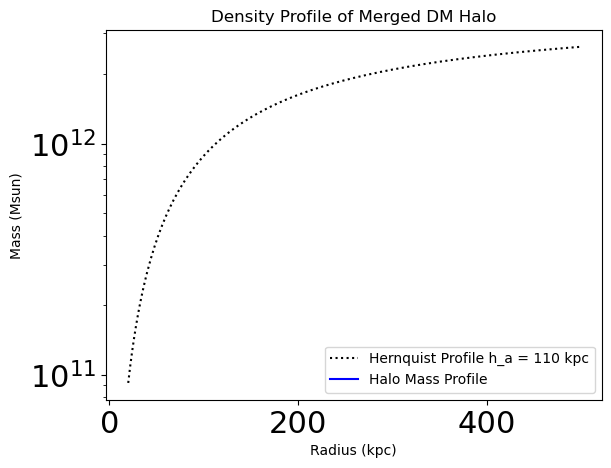

In [77]:
#Make plot of Hernquist Density Profile
plt.plot(r, mass, color='black', ls=':', label=f'Hernquist Profile h_a = {scale_h} kpc') #Hernquist
plt.plot(r, mass_profile, color='blue', label='Halo Mass Profile') #determined density profile
plt.xlabel('Radius (kpc)')
#plt.ylabel('Density (Msun/kpc^3)')
plt.ylabel('Mass (Msun)')
plt.title('Density Profile of Merged DM Halo')
plt.semilogy()
plt.legend()

#best fit chosen s.t. mass profile matches at larger radii. Found best fit for h_a = 55 kpc
#NOW, using my new scale radius, I can use my Hernquist density profile with this scale radius, and then find my halo edgeat R200.

#rho_crit = 132.75 Msun/kpc^3
#R200 at rho = 265.5e2 Msun/kpc^3

#plotting line of consant density at 200*rho_crit
#plt.hlines(265.5e2, 0, 500)

In [ ]:
#finding the R200 radius
#need to find the index of the density profile that gives density value closest to 26550 Msun/kpc^3

#R200 radius: Where the mean density within a sphere of radius R200 has a density of 200*rho_crit

for index in range(len(r)):
    print(rho[index].value, 'index:', index)
    
#create loop that checks if the density at whatever index is larger or smaller than the target density. if its smaller we save the index, if its 
#larger then we stop the loop and the index that we saved is the index for the R200 radius.

#INDEX: 72

In [12]:
R200 = r[72]*u.kpc
R200
#the same R200 radius at snapshot 600 and 420. We can use it for all snapshots

<Quantity 149. kpc>

In [22]:
data = IsoContour('Combined_HighRes/MW_M31',600) #initialize data for snapnumber 600

In [23]:
C_pos, C_vel = data.PositionData(1) #reframe coordinate system

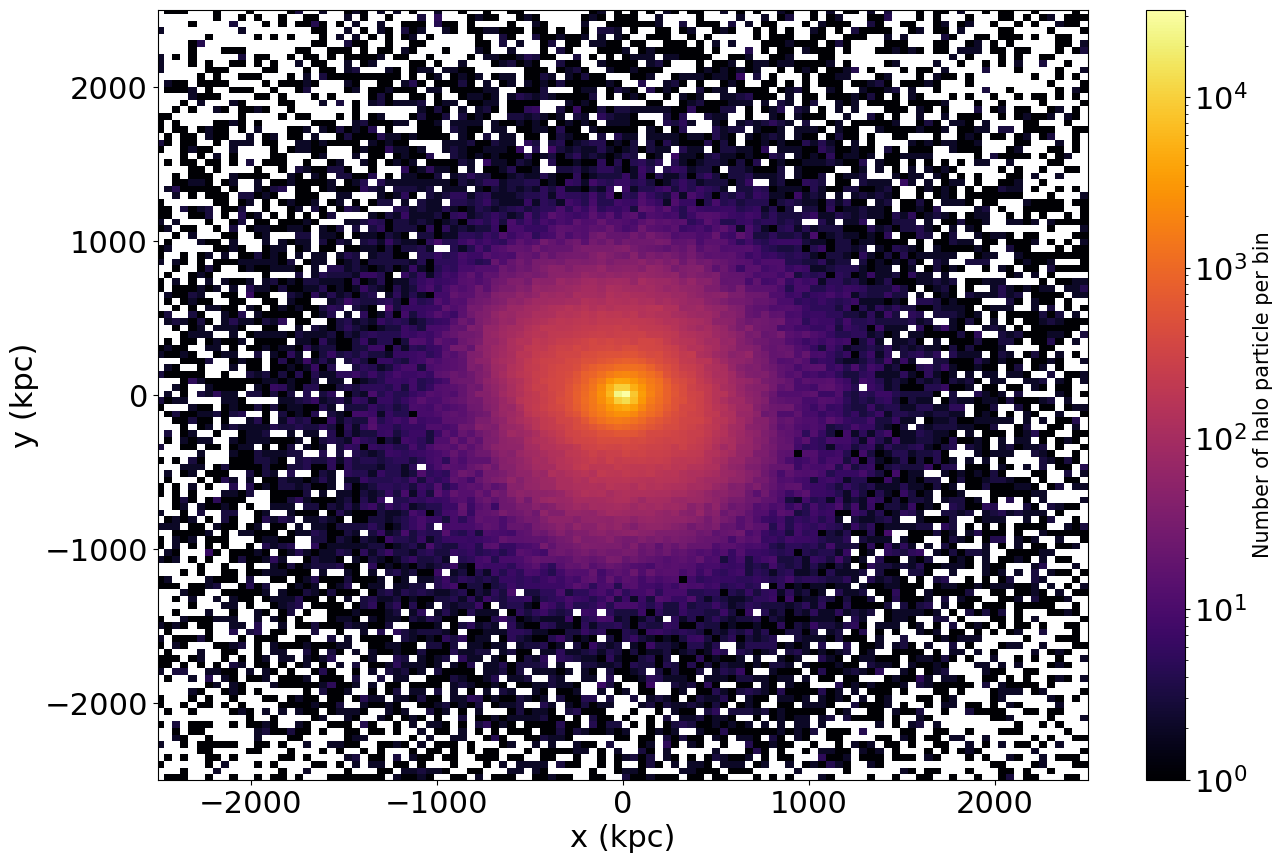

In [26]:
#plotting projection of xy-plane for rotated coordinate system

#coordinate data
cx = C_pos[:,0]
cy = C_pos[:,1]
cz = C_pos[:,2]

# M31 Disk Density 
fig, ax= plt.subplots(figsize=(15, 10))

# plot the particle density for M31 , 2D histogram
plt.hist2d(cx, cy, bins=500, norm=LogNorm(), cmap='inferno')

cbar = plt.colorbar()
cbar.set_label("Number of halo particle per bin", fontsize=15)

# Add axis labels
plt.xlabel('x (kpc)', fontsize=22)
plt.ylabel('y (kpc)', fontsize=22)

#set axis limits
plt.ylim(-2500,2500)
plt.xlim(-2500,2500)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

fig.savefig('xy-projection of halo number density.jpg')

In [68]:
#constuct histogram to fit ellipse
counts, xedges, yedges = np.histogram2d(cx, cy, bins = 100, range = ((-1000, 1000), (-1000, 1000)))
#our bin size is:
x_binsize = xedges[1] - xedges[0]
y_binsize = yedges[1] - yedges[0]

#converting the center into pixel units
x_cen_pixel = -xedges[0]/x_binsize
y_cen_pixel = -yedges[0]/y_binsize

In [70]:
#constructing guess ellipse
#defining the ellipse geometry
geometry = EllipseGeometry(x0 = x_cen_pixel, y0 = y_cen_pixel, sma = 100/x_binsize, eps = 0.1, pa = 1)
#sma is the semi-major axis, eps is the ellipticity and pa is the position angle


In [72]:
ellipse = Ellipse(counts.T, geometry) #initializing the ellipse object
#you need to transpose the counts matrix to reverse the effect of transposition that Ellipse does internally
isolist = ellipse.fit_image() 
#if isolist doesn't work, it might be because the initial ellipse guess was initialized with a default value that results in an empty sequence
#AKA make a different initial guess

C:\Users\ethan\AppData\Local\Temp\ipykernel_4204\3895676074.py:4: RuntimeWarning: divide by zero encountered in log10
  im = plt.imshow(np.log10(counts).T, cmap = cm, origin = "lower")


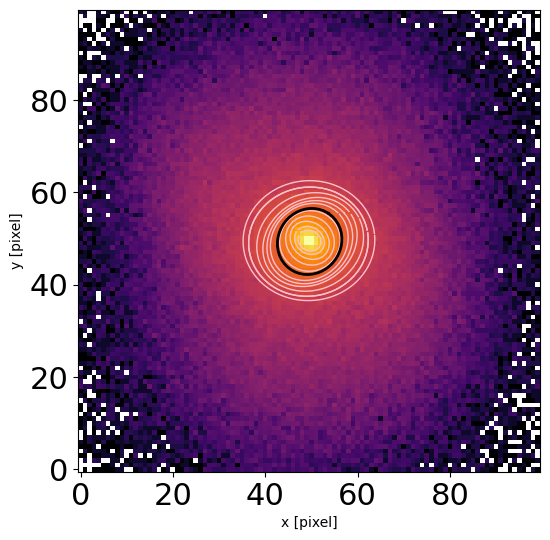

In [73]:
fig = plt.figure(figsize = (8, 6))
ax0 = fig.add_subplot(1, 1, 1)
cm = plt.cm.inferno
im = plt.imshow(np.log10(counts).T, cmap = cm, origin = "lower")
ax0.set_xlabel('x [pixel]')
ax0.set_ylabel('y [pixel]')
#fig.colorbar(im)

#defining the semi-major axes in pixel coordinates
sma_min = 50/x_binsize
sma_max = 300/x_binsize
separation = 20/x_binsize
sma_array = np.arange(sma_min, sma_max, separation) #each contour will be separated by 10 kpc

for my_sma in sma_array:
    iso = isolist.get_closest(my_sma)
    #the get_closest method obtains the elliptical contour whose semi-major axis is closest to what you want
    x, y = iso.sampled_coordinates()
    if my_sma == 150/x_binsize:
        ax0.plot(x,y, color='black', lw=2)
    else:
        ax0.plot(x, y, color = 'pink', linewidth = 1)


plt.show()
fig.savefig('halo contour fitting.jpg')
#we know R200 ~ 150kpc, so we plot best fit for that

In [50]:
sma_kpc = 150 #R200 value in kpc
sma_pixel = 150/x_binsize #rR200 in pixel units

#obtain the elliptical contour whose semi-major axis is closest to 150 kpc
iso_150 = isolist.get_closest(sma_pixel)

eps_150 = iso_150.eps
angle = iso_150.pa*180/np.pi #converting position angle to degrees 
print("Ellipticity of 150 kpc elliptical contour in the xy-projection:", np.round(eps_150, 2))

#found a value of 0.31 for the ellipticity.

Ellipticity of 150 kpc elliptical contour in the xy-projection: 0.03


In [82]:
class IsoContour:
    """A class that fits isodensity contours on MW-M31-M33 simulation data
    to find the edge of the dark matter halo.
    """
    
    def __init__(self, galaxy, snap_num):
        """Initializes the class by extracting the data of given galaxy and given snap
        number. It only reads the combined files right now.

        PARAMETERS
        ----------
            galaxy: 'string'
                The name of the galaxy inputted as a string.
                Used to construct the name of the data file
            snap_num: 'int'
                The snapshot number
        """

        # Determine Filename
        # add a string of the filenumber to the value "000"
        ilbl = '000' + str(snap_num)
        # remove all but the last 3 digits
        ilbl = ilbl[-3:]
        # create filenames
        self.filename='%s_'%(galaxy) + ilbl + '.txt'
        
        # read the particle data                                                                                             
        self.data = ReadCombined(self.filename)

        # store the mass, positions, velocities of all particles                                
        self.m = self.data['m'] #*u.Msun
        self.x = self.data['x'] #u.kpc
        self.y = self.data['y'] #u.kpc
        self.z = self.data['z'] #u.kpc
    
        # store galaxy name and snap number
        self.gname = galaxy
        self.snap = snap_num
        

    def PositionData(self, ptype):
        """This method isolates the data of a given particle type, 
        and shifts its reference frame so that its COM is at the origin.

        PARAMETERS
        ----------
            ptype: 'int'
                The particle type. Valid inputs are:
                (1 - halo, 2 - disk, 3 - bulge)
        OUTPUTS
        -------
            pos: 'np.ndarray'
                The x, y, and z position data in the shifted
                coordinate frame. Units of kpc
            vel: 'np.ndarray'
                The vx, vy, and vz velocity data in the shifted
                coordinate frame. Units of km/s
        """

        #Define all particle positions in COM reference frame
        
        #create COM object for ptype
        COM = COMC(self.filename, ptype)
        
        #define COM position of merged galaxy
        COM_p = COM.COM_P(delta=0.1)
        
        #Determine positions of particles relative to COM 
        x = COM.x - COM_p[0].value 
        y = COM.y - COM_p[1].value 
        z = COM.z - COM_p[2].value 
        
        #repeat for velocity
        #define COM velocity
        COM_v = COM.COM_V(COM_p[0], COM_p[1], COM_p[2])
        
        #Find velocities in COM reference frame
        vx = COM.vx - COM_v[0].value
        vy = COM.vy - COM_v[1].value
        vz = COM.vz - COM_v[2].value

        pos = np.array([x,y,z])
        vel = np.array([vx,vy,vz])
        
        return pos, vel

    
    def ContourPlotting(self, ptype, init_sma=100, R200=149, bin_num=100, sma_min=50, sma_max=300):
        """This function creates isodensity contours for different radii for a
        number desnity plot of halo particles. It finds the best fit ellipse
        for the R200 edge of the halo. Two isodensity contours are created in the 
        xy and xz planes, where both share a semi major axis equivalent to the 
        R200 radius.
    
        PARAMETERS
        ----------
            ptype: 'int'
                The particle type to plot contours on.
                (1 - halo, 2 - disk, 3 - bulge)
            init_sma: 'int'
                The initial semi-major axis guess. (kpc)
            R200: 'float'
                The R200 radius, representing the edge of the halo (kpc).
                R200 = 149.8 kpc throughout the simulation.
            bin_num: 'int'
                The binsize.
            sma_min: 'int'
                Minimum semi-major axis value (kpc)
            sma_max: 'int
                Max semi-major axis value (kpc)
    
        OUTPUTS
        -------
            eps_xy: 'float'
                The ellipticity of the best fit ellipse in the xy-projection.
            eps_xz: 'float'
                The ellipticity of the best fit ellipse in the xz-projection.
        """
        #Shift coordinate frame 
        pos, vel = self.PositionData(ptype)
    
        #separate position components
        cx = pos[:,0]
        cy = pos[:,1]
        cz = pos[:,2]

        #constuct histograms of xy and xz projections for ellipse fitting.
        #we have square dimensions here, allowing for simplification of computation.
        
        #xy-projecion
        counts_xy, xedges_xy, yedges_xy = np.histogram2d(cx, cy, bins=bin_num, range = ((-1000, 1000), (-1000, 1000)))
        
        #xz-projecion
        counts_xz, xedges_xz, zedges_xz = np.histogram2d(cx, cz, bins=bin_num, range = ((-1000, 1000), (-1000, 1000)))
    

        #NOTE: Because they share the same bin number and range, the edges of each of the above hisograms
        #are all the same, so any of them can be used. We use xedges_xy and yedges_xy from here onward.
        #Further, their binsizes, center pixels, and ellipse geometry will be the same as well. 
        
        #our bin size is:
        binsize = xedges_xy[1] - xedges_xy[0]
        
        #converting the center into pixel units
        cen_pixel = -xedges_xy[0]/binsize
        cen_pixel = -yedges_xy[0]/binsize
        
        #constructing guess ellipse for xy-plane
        #defining the ellipse geometry
        geometry_xy = EllipseGeometry(x0 = cen_pixel, y0 = cen_pixel, sma = init_sma/binsize, eps = 0.1, pa = 1)
        #sma is the semi-major axis, eps is the ellipticity and pa is the position angle

        #here, the different projections deviate, as their counts are different.
        ellipse_xy = Ellipse(counts_xy.T, geometry_xy) #initializing the ellipse object for xy-projection
        #you need to transpose the counts matrix to reverse the effect of transposition that Ellipse does internally
        
        isolist_xy = ellipse_xy.fit_image()
        #if isolist doesn't work, it might be because the initial ellipse guess was initialized with a default value that results in an empty sequence
        #AKA make a different initial guess
        #an initial guess with the initial values of ellipticity or position angle set to zero will provide bad ellipse fitting, so provide initial values.

        #R200 in pixel units
        R200_pixel = R200/binsize 
        
        #Obtain the elliptical contour whose semi-major axis is closest fit to R200
        iso_R200_xy = isolist_xy.get_closest(R200_pixel)

        #extract ellipticity data and position angle for contruction of second ellipse.
        eps_xy = iso_R200_xy.eps
        pa_xy = iso_R200_xy.pa
        #use these data to contstruct the guess ellipse for the xz-plane.

        #construct new guess ellipse
        geometry_xz = EllipseGeometry(x0 = cen_pixel, y0 = cen_pixel, sma = init_sma/binsize, eps=0.1, pa=1) 

        #initialize ellipse
        ellipse_xz = Ellipse(counts_xz.T, geometry_xz)
        
        #fit ellipse to image
        isolist_xz = ellipse_xz.fit_image()

        #xz-ellipse uses same semi-major axis a=R200, but rotated in plane by position angle of xy-ellipse.
        #if we look at it as a projection, then the xz plane only gets a portion of the R200 semi major axis, assuming there is some
        #non-zero position angle to consider.
        xz_sma = (R200*np.cos(pa_xy))/binsize

        #obtain ellipse with sma closest fit to our expected value
        iso_R200_xz = isolist_xz.get_closest(xz_sma)

        #obtain ellipticity
        eps_xz = iso_R200_xz.eps
 
        return eps_xy, eps_xz
             
                    

In [84]:
IS = IsoContour(r'Combined_HighRes\MW_M31', 600) #initialize data for snapshot 600

eps = IS.ContourPlotting(1) #ellipticity of each axis of best fit ellipse

C:\Users\ethan\anaconda3\Lib\site-packages\photutils\isophote\fitter.py:318: RuntimeWarning: invalid value encountered in scalar divide
  aux = -harmonic * (1.0 - sample.geometry.eps) / sample.gradient


ValueError: cannot convert float NaN to integer

In [ ]:
#create array of merged galaxy snap numbers
snap_array = np.arange(420, 801, 30)

#initialize ellipticity array
eps_array = np.zeros((len(snap_array),2))

In [ ]:
#find and store ellipticity of each axis for each snapshot in snap_array

#index 
i = 0 

for snap in snap_array:
    ##initialize class
    IsoCon = IsoContour(r'Combined/MW_M31', snap)
    #find ellipticity
    eps = IsoCon.ContourPlotting(1)
    #store ellipticity in array
    eps_array[i,:] = eps
    #update index
    i += 1 

In [71]:
#compute the average ellipticity values of each projection
ave_xy = sum(eps_array[:,0])/len(eps_array[:,0])
ave_xz = sum(eps_array[:,1])/len(eps_array[:,1])
ave_yz = sum(eps_array[:,2])/len(eps_array[:,2])

print(ave_xy, ave_xz, ave_yz)  

0.09387510453138516 0.20407833289516775 0.18969695288248994


In [135]:
#makes sense that the earliest snapshots have the highest ellipticities. The matter is still settling after the merger
#all projections have a negative trend, with a slight uptick in ellipticity around snap 550 for the xy and yz planes.

#the xy-projection has a shallower decline, which I believe is due to stretching in the direction of the merger.
#the yz leaps up in ellipticity at snap ~550, whereas the xy has a sharp decline and bounces around a low ellipticity.

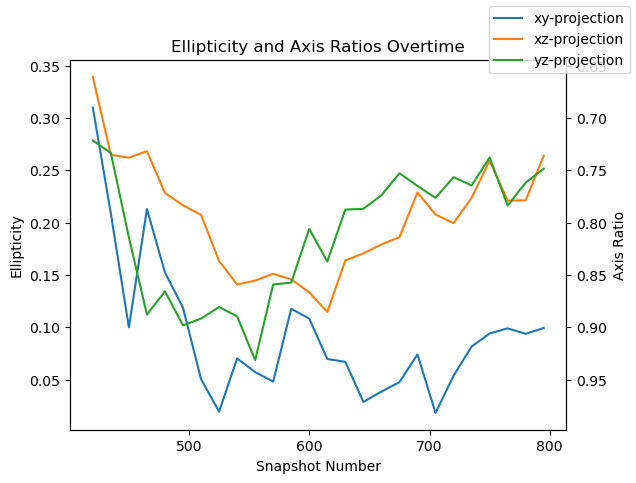

In [133]:
def el2ar(el):
    """
    Returns axis ratio from ellipticity
    """
    return 1-el


def make_plot():

    # Define a closure function to register as a callback
    def convert_ar(ax_f):
        """
        Update second axis according to first axis.
        """
        y1, y2 = ax_f.get_ylim()
        ax_c.set_ylim(el2ar(y1), el2ar(y2))
        ax_c.figure.canvas.draw()

    fig, ax_f = plt.subplots()
    ax_c = ax_f.twinx()

    # automatically update ylim of ax2 when ylim of ax1 changes.
    ax_f.callbacks.connect("ylim_changed", convert_ar)
    ax_f.plot(snap_array, eps_array[:,0], label='xy-projection')
    ax_f.plot(snap_array, eps_array[:,1], label='xz-projection')

    #ax_f.set_xlim(0, 100)

    ax_f.set_title('Ellipticity and Axis Ratios Overtime')
    ax_f.set_ylabel('Ellipticity')
    ax_c.set_ylabel('Axis Ratio')
    ax_f.set_xlabel('Snapshot Number')

    #ax_f.xtick.labelsize = 6
    #ax_f.ytick.labelsize = 6
    #ax_c.ytick.labelsize = 6

    label_size = 15
    matplotlib.rcParams['xtick.labelsize'] = label_size 
    matplotlib.rcParams['ytick.labelsize'] = label_size

    fig.legend()
    plt.show()

    fig.savefig('Ellipticity and Axis Ratios.jpg',overwrite=True)


make_plot()